Tarea### [Tarea 11] Ejercicios Unidad 04-D | Gauss-Jacobi y Gauss-Seidel
- David Pilataxi
- Gr1cc
Link al repositorio:  
https://github.com/DavidPilataxi/Metodos-Enero-Febrero/blob/main/Tarea10/Tarea%2010.ipynb

CONJUNTO DE EJERCICIOS. -  
1. Encuentre las primeras dos iteraciones del método de Jacobi para los siguientes sistemas lineales, por medio de x^0=0  
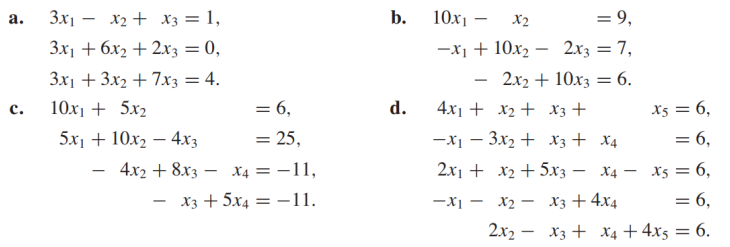



In [1]:
import numpy as np

def jacobi_iteration(matrix, vector, initial_guess, num_iterations):
    """Resuelve un sistema de ecuaciones mediante el método de Jacobi."""
    size = len(vector)
    x_current = initial_guess.copy()
    results_list = [initial_guess.copy()]

    for _ in range(num_iterations):
        x_next = np.zeros_like(x_current)

        for i in range(size):
            sum_before = np.dot(matrix[i, :i], x_current[:i])
            sum_after = np.dot(matrix[i, i+1:], x_current[i+1:])
            x_next[i] = (vector[i] - sum_before - sum_after) / matrix[i, i]

        results_list.append(x_next.copy())
        x_current = x_next

    return results_list

# Definir sistemas de ecuaciones
equation_systems = {
    "A": {
        "matrix": np.array([[3, -1, 1],
                            [3, 6, 2],
                            [3, 3, 7]], dtype=float),
        "vector": np.array([1, 0, 4], dtype=float)
    },
    "B": {
        "matrix": np.array([[10, -1, 0],
                            [-1, 10, -2],
                            [0, -2, 10]], dtype=float),
        "vector": np.array([9, 7, 6], dtype=float)
    },
    "C": {
        "matrix": np.array([[10, 5, 0, 0],
                            [5, 10, -4, 0],
                            [0, -4, 8, -1],
                            [0, 0, -1, 5]], dtype=float),
        "vector": np.array([6, 25, -11, -11], dtype=float)
    },
    "D": {
        "matrix": np.array([[4, 1, 1, 0, 1],
                            [-1, -3, 1, 1, 0],
                            [2, 1, 5, -1, -1],
                            [-1, -1, -1, 4, 0],
                            [0, 2, -1, 1, 4]], dtype=float),
        "vector": np.array([6, 6, 6, 6, 6], dtype=float)
    }
}

# Definir valores iniciales
initial_guesses = {key: np.zeros(len(data["vector"])) for key, data in equation_systems.items()}

# Número de iteraciones
num_iterations = 2

# Resolver los sistemas usando Jacobi
for label, system in equation_systems.items():
    A_matrix = system["matrix"]
    b_vector = system["vector"]
    x_initial = initial_guesses[label]
    solutions = jacobi_iteration(A_matrix, b_vector, x_initial, num_iterations)

    print(f"\nResultados para el sistema {label} con Jacobi:")
    for iteration, solution in enumerate(solutions):
        print(f"Iteración {iteration}: {solution}")



Resultados para el sistema A con Jacobi:
Iteración 0: [0. 0. 0.]
Iteración 1: [0.33333333 0.         0.57142857]
Iteración 2: [ 0.14285714 -0.35714286  0.42857143]

Resultados para el sistema B con Jacobi:
Iteración 0: [0. 0. 0.]
Iteración 1: [0.9 0.7 0.6]
Iteración 2: [0.97 0.91 0.74]

Resultados para el sistema C con Jacobi:
Iteración 0: [0. 0. 0. 0.]
Iteración 1: [ 0.6    2.5   -1.375 -2.2  ]
Iteración 2: [-0.65   1.65  -0.4   -2.475]

Resultados para el sistema D con Jacobi:
Iteración 0: [0. 0. 0. 0. 0.]
Iteración 1: [ 1.5 -2.   1.2  1.5  1.5]
Iteración 2: [ 1.325 -1.6    1.6    1.675  2.425]


2. Repita el ejercicio 1 usando el método de Gauss-Siedel.


In [2]:
import numpy as np

def gauss_seidel(A_matrix, b_vector, initial_guess, num_iterations, decimals=4):
    """Resuelve un sistema de ecuaciones mediante el método de Gauss-Seidel con truncado de decimales."""
    size = len(b_vector)
    x_current = initial_guess.copy()
    results_list = [np.round(initial_guess.copy(), decimals)]

    for _ in range(num_iterations):
        for i in range(size):
            sum_before = np.dot(A_matrix[i, :i], x_current[:i])
            sum_after = np.dot(A_matrix[i, i+1:], x_current[i+1:])
            x_current[i] = (b_vector[i] - sum_before - sum_after) / A_matrix[i, i]

        results_list.append(np.round(x_current.copy(), decimals))

    return results_list

# Definir sistemas de ecuaciones
equation_systems = {
    "A": {
        "matrix": np.array([[3, -1, 1],
                            [3, 6, 2],
                            [3, 3, 7]], dtype=float),
        "vector": np.array([1, 0, 4], dtype=float)
    },
    "B": {
        "matrix": np.array([[10, -1, 0],
                            [-1, 10, -2],
                            [0, -2, 10]], dtype=float),
        "vector": np.array([9, 7, 6], dtype=float)
    },
    "C": {
        "matrix": np.array([[10, 5, 0, 0],
                            [5, 10, -4, 0],
                            [0, -4, 8, -1],
                            [0, 0, -1, 5]], dtype=float),
        "vector": np.array([6, 25, -11, -11], dtype=float)
    },
    "D": {
        "matrix": np.array([[4, 1, 1, 0, 1],
                            [-1, -3, 1, 1, 0],
                            [2, 1, 5, -1, -1],
                            [-1, -1, -1, 4, 0],
                            [0, 2, -1, 1, 4]], dtype=float),
        "vector": np.array([6, 6, 6, 6, 6], dtype=float)
    }
}

# Definir valores iniciales
initial_guesses = {key: np.zeros(len(data["vector"])) for key, data in equation_systems.items()}

# Número de iteraciones
num_iterations = 2

# Resolver cada sistema usando Gauss-Seidel
for label, system in equation_systems.items():
    A_matrix = system["matrix"]
    b_vector = system["vector"]
    x_initial = initial_guesses[label]
    solutions = gauss_seidel(A_matrix, b_vector, x_initial, num_iterations)

    print(f"\nResultados para el sistema {label} con Gauss-Seidel:")
    for iteration, solution in enumerate(solutions):
        print(f"Iteración {iteration}: {solution}")



Resultados para el sistema A con Gauss-Seidel:
Iteración 0: [0. 0. 0.]
Iteración 1: [ 0.3333 -0.1667  0.5   ]
Iteración 2: [ 0.1111 -0.2222  0.619 ]

Resultados para el sistema B con Gauss-Seidel:
Iteración 0: [0. 0. 0.]
Iteración 1: [0.9   0.79  0.758]
Iteración 2: [0.979  0.9495 0.7899]

Resultados para el sistema C con Gauss-Seidel:
Iteración 0: [0. 0. 0. 0.]
Iteración 1: [ 0.6    2.2   -0.275 -2.255]
Iteración 2: [-0.5     2.64   -0.3369 -2.2674]

Resultados para el sistema D con Gauss-Seidel:
Iteración 0: [0. 0. 0. 0. 0.]
Iteración 1: [ 1.5    -2.5     1.1     1.525   2.6438]
Iteración 2: [ 1.1891 -1.5214  1.8624  1.8825  2.2556]


3. Utilice el método de Jacobi para resolver los sistemas lineales en el ejercicio 1, con  
*TOL* = 10<sub>-3</sub>.


In [4]:
import numpy as np

def jacobi_with_tolerance(A_matrix, b_vector, initial_guess, tolerance, decimals=4):
    """Resuelve un sistema de ecuaciones mediante el método de Jacobi con criterio de tolerancia."""
    size = len(b_vector)
    x_current = initial_guess.copy()
    results_list = [np.round(initial_guess.copy(), decimals)]
    iteration = 0

    while True:
        x_next = np.zeros_like(x_current)

        for i in range(size):
            sum_before = np.dot(A_matrix[i, :i], x_current[:i])
            sum_after = np.dot(A_matrix[i, i+1:], x_current[i+1:])
            x_next[i] = (b_vector[i] - sum_before - sum_after) / A_matrix[i, i]

        results_list.append(np.round(x_next.copy(), decimals))
        iteration += 1

        # Criterio de parada basado en la norma infinita
        if np.linalg.norm(x_next - x_current, ord=np.inf) < tolerance:
            break

        x_current = x_next

    return results_list

# Definir sistemas de ecuaciones
equation_systems = {
    "A": {
        "matrix": np.array([[3, -1, 1],
                            [3, 6, 2],
                            [3, 3, 7]], dtype=float),
        "vector": np.array([1, 0, 4], dtype=float)
    },
    "B": {
        "matrix": np.array([[10, -1, 0],
                            [-1, 10, -2],
                            [0, -2, 10]], dtype=float),
        "vector": np.array([9, 7, 6], dtype=float)
    },
    "C": {
        "matrix": np.array([[10, 5, 0, 0],
                            [5, 10, -4, 0],
                            [0, -4, 8, -1],
                            [0, 0, -1, 5]], dtype=float),
        "vector": np.array([6, 25, -11, -11], dtype=float)
    },
    "D": {
        "matrix": np.array([[4, 1, 1, 0, 1],
                            [-1, -3, 1, 1, 0],
                            [2, 1, 5, -1, -1],
                            [-1, -1, -1, 4, 0],
                            [0, 2, -1, 1, 4]], dtype=float),
        "vector": np.array([6, 6, 6, 6, 6], dtype=float)
    }
}

# Definir valores iniciales
initial_guesses = {key: np.zeros(len(data["vector"])) for key, data in equation_systems.items()}

# Tolerancia
tolerance = 1e-3

# Resolver cada sistema usando Jacobi con tolerancia
for label, system in equation_systems.items():
    A_matrix = system["matrix"]
    b_vector = system["vector"]
    x_initial = initial_guesses[label]
    solutions = jacobi_with_tolerance(A_matrix, b_vector, x_initial, tolerance)

    print(f"\nResultados para el sistema {label} con Jacobi (TOL = {tolerance}):")
    for iteration, solution in enumerate(solutions):
        print(f"Iteración {iteration}: {solution}")



Resultados para el sistema A con Jacobi (TOL = 0.001):
Iteración 0: [0. 0. 0.]
Iteración 1: [0.3333 0.     0.5714]
Iteración 2: [ 0.1429 -0.3571  0.4286]
Iteración 3: [ 0.0714 -0.2143  0.6633]
Iteración 4: [ 0.0408 -0.2568  0.6327]
Iteración 5: [ 0.0368 -0.2313  0.664 ]
Iteración 6: [ 0.0349 -0.2398  0.6548]
Iteración 7: [ 0.0352 -0.2357  0.6592]
Iteración 8: [ 0.035  -0.2373  0.6574]
Iteración 9: [ 0.0351 -0.2366  0.6581]

Resultados para el sistema B con Jacobi (TOL = 0.001):
Iteración 0: [0. 0. 0.]
Iteración 1: [0.9 0.7 0.6]
Iteración 2: [0.97 0.91 0.74]
Iteración 3: [0.991 0.945 0.782]
Iteración 4: [0.9945 0.9555 0.789 ]
Iteración 5: [0.9956 0.9572 0.7911]
Iteración 6: [0.9957 0.9578 0.7914]

Resultados para el sistema C con Jacobi (TOL = 0.001):
Iteración 0: [0. 0. 0. 0.]
Iteración 1: [ 0.6    2.5   -1.375 -2.2  ]
Iteración 2: [-0.65   1.65  -0.4   -2.475]
Iteración 3: [-0.225   2.665  -0.8594 -2.28  ]
Iteración 4: [-0.7325  2.2688 -0.3275 -2.3719]
Iteración 5: [-0.5344  2.7352 -

4. Utilice el método de Gauss-Siedel para resolver los sistemas lineales en el ejercicio 1, con  
*TOL* = 10<sub>-3</sub>.

In [5]:
import numpy as np

def gauss_seidel_with_tolerance(A_matrix, b_vector, initial_guess, tolerance, decimals=4):
    """Resuelve un sistema de ecuaciones mediante el método de Gauss-Seidel con criterio de tolerancia."""
    size = len(b_vector)
    x_current = initial_guess.copy()
    results_list = [np.round(initial_guess.copy(), decimals)]

    while True:
        x_next = x_current.copy()

        for i in range(size):
            sum_before = np.dot(A_matrix[i, :i], x_next[:i])
            sum_after = np.dot(A_matrix[i, i+1:], x_current[i+1:])
            x_next[i] = (b_vector[i] - sum_before - sum_after) / A_matrix[i, i]

        results_list.append(np.round(x_next.copy(), decimals))

        # Criterio de parada basado en la norma infinita
        if np.linalg.norm(x_next - x_current, ord=np.inf) < tolerance:
            break

        x_current = x_next

    return results_list

# Definir sistemas de ecuaciones
equation_systems = {
    "A": {
        "matrix": np.array([[3, -1, 1],
                            [3, 6, 2],
                            [3, 3, 7]], dtype=float),
        "vector": np.array([1, 0, 4], dtype=float)
    },
    "B": {
        "matrix": np.array([[10, -1, 0],
                            [-1, 10, -2],
                            [0, -2, 10]], dtype=float),
        "vector": np.array([9, 7, 6], dtype=float)
    },
    "C": {
        "matrix": np.array([[10, 5, 0, 0],
                            [5, 10, -4, 0],
                            [0, -4, 8, -1],
                            [0, 0, -1, 5]], dtype=float),
        "vector": np.array([6, 25, -11, -11], dtype=float)
    },
    "D": {
        "matrix": np.array([[4, 1, 1, 0, 1],
                            [-1, -3, 1, 1, 0],
                            [2, 1, 5, -1, -1],
                            [-1, -1, -1, 4, 0],
                            [0, 2, -1, 1, 4]], dtype=float),
        "vector": np.array([6, 6, 6, 6, 6], dtype=float)
    }
}

# Definir valores iniciales
initial_guesses = {key: np.zeros(len(data["vector"])) for key, data in equation_systems.items()}

# Tolerancia
tolerance = 1e-3

# Resolver cada sistema usando Gauss-Seidel con tolerancia
for label, system in equation_systems.items():
    A_matrix = system["matrix"]
    b_vector = system["vector"]
    x_initial = initial_guesses[label]
    solutions = gauss_seidel_with_tolerance(A_matrix, b_vector, x_initial, tolerance)

    print(f"\nResultados para el sistema {label} con Gauss-Seidel (TOL = {tolerance}):")
    for iteration, solution in enumerate(solutions):
        print(f"Iteración {iteration}: {solution}")



Resultados para el sistema A con Gauss-Seidel (TOL = 0.001):
Iteración 0: [0. 0. 0.]
Iteración 1: [ 0.3333 -0.1667  0.5   ]
Iteración 2: [ 0.1111 -0.2222  0.619 ]
Iteración 3: [ 0.0529 -0.2328  0.6485]
Iteración 4: [ 0.0396 -0.236   0.6556]
Iteración 5: [ 0.0361 -0.2366  0.6573]
Iteración 6: [ 0.0354 -0.2368  0.6578]

Resultados para el sistema B con Gauss-Seidel (TOL = 0.001):
Iteración 0: [0. 0. 0.]
Iteración 1: [0.9   0.79  0.758]
Iteración 2: [0.979  0.9495 0.7899]
Iteración 3: [0.995  0.9575 0.7915]
Iteración 4: [0.9957 0.9579 0.7916]

Resultados para el sistema C con Gauss-Seidel (TOL = 0.001):
Iteración 0: [0. 0. 0. 0.]
Iteración 1: [ 0.6    2.2   -0.275 -2.255]
Iteración 2: [-0.5     2.64   -0.3369 -2.2674]
Iteración 3: [-0.72    2.7252 -0.2958 -2.2592]
Iteración 4: [-0.7626  2.763  -0.2759 -2.2552]
Iteración 5: [-0.7815  2.7804 -0.2667 -2.2533]
Iteración 6: [-0.7902  2.7884 -0.2625 -2.2525]
Iteración 7: [-0.7942  2.7921 -0.2605 -2.2521]
Iteración 8: [-0.7961  2.7938 -0.2596 -

5. El sistema lineal, tiene la solución (1, 2, -1)  
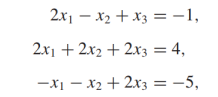  
a) Muestre que el método de Jacobi con $x_{(0)} = 0$ falla al proporcionar una buena aproximación después de 25 iteraciones."
   ]

In [6]:
import numpy as np

def jacobi_with_iterations(A_matrix, b_vector, initial_guess, max_iterations, decimals=4):
    """Resuelve un sistema de ecuaciones mediante el método de Jacobi con un número fijo de iteraciones."""
    size = len(b_vector)
    x_current = initial_guess.copy()
    results_list = [np.round(initial_guess.copy(), decimals)]

    for _ in range(max_iterations):
        x_next = np.zeros_like(x_current)

        for i in range(size):
            sum_before = np.dot(A_matrix[i, :i], x_current[:i])
            sum_after = np.dot(A_matrix[i, i+1:], x_current[i+1:])
            x_next[i] = (b_vector[i] - sum_before - sum_after) / A_matrix[i, i]

        results_list.append(np.round(x_next.copy(), decimals))
        x_current = x_next

    return results_list

# Definir la matriz de coeficientes y el vector de términos independientes
A_matrix = np.array([[2, -1,  1],
                     [2,  2,  2],
                     [-1, -1,  2]], dtype=float)

b_vector = np.array([-1, 4, -5], dtype=float)

# Definir valores iniciales
initial_guess = np.zeros(len(b_vector))

# Número máximo de iteraciones
max_iterations = 25

# Aplicar método de Jacobi
jacobi_results = jacobi_with_iterations(A_matrix, b_vector, initial_guess, max_iterations)

# Mostrar resultados
print("\nResultados del método de Jacobi con 25 iteraciones:")
for iteration, solution in enumerate(jacobi_results):
    print(f"Iteración {iteration}: {solution}")



Resultados del método de Jacobi con 25 iteraciones:
Iteración 0: [0. 0. 0.]
Iteración 1: [-0.5  2.  -2.5]
Iteración 2: [ 1.75  5.   -1.75]
Iteración 3: [2.875 2.    0.875]
Iteración 4: [ 0.0625 -1.75   -0.0625]
Iteración 5: [-1.3438  2.     -3.3438]
Iteración 6: [ 2.1719  6.6875 -2.1719]
Iteración 7: [3.9297 2.     1.9297]
Iteración 8: [-0.4648 -3.8594  0.4648]
Iteración 9: [-2.6621  2.     -4.6621]
Iteración 10: [ 2.8311  9.3242 -2.8311]
Iteración 11: [5.5776 2.     3.5776]
Iteración 12: [-1.2888 -7.1553  1.2888]
Iteración 13: [-4.722  2.    -6.722]
Iteración 14: [ 3.861  13.4441 -3.861 ]
Iteración 15: [8.1526 2.     6.1526]
Iteración 16: [ -2.5763 -12.3051   2.5763]
Iteración 17: [-7.9407  2.     -9.9407]
Iteración 18: [ 5.4703 19.8814 -5.4703]
Iteración 19: [12.1759  2.     10.1759]
Iteración 20: [ -4.5879 -20.3517   4.5879]
Iteración 21: [-12.9698   2.     -14.9698]
Iteración 22: [ 7.9849 29.9397 -7.9849]
Iteración 23: [18.4623  2.     16.4623]
Iteración 24: [ -7.7311 -32.9246   7

b) Utilice el método de Gauss-Siedel con $x_{(0)} = 0$: para aproximar la solución para el sistema lineal dentro de $10^{-5}$"
   

In [7]:
import numpy as np

def gauss_seidel_with_tolerance(A_matrix, b_vector, initial_guess, tolerance, decimals=4):
    """Resuelve un sistema de ecuaciones mediante el método de Gauss-Seidel con criterio de tolerancia."""
    size = len(b_vector)
    x_current = initial_guess.copy()
    results_list = [np.round(initial_guess.copy(), decimals)]

    while True:
        x_next = x_current.copy()

        for i in range(size):
            sum_before = np.dot(A_matrix[i, :i], x_next[:i])
            sum_after = np.dot(A_matrix[i, i+1:], x_current[i+1:])
            x_next[i] = (b_vector[i] - sum_before - sum_after) / A_matrix[i, i]

        results_list.append(np.round(x_next.copy(), decimals))

        # Criterio de parada basado en la norma infinita
        if np.linalg.norm(x_next - x_current, ord=np.inf) < tolerance:
            break

        x_current = x_next

    return results_list

# Definir la matriz de coeficientes y el vector de términos independientes
A_matrix = np.array([[2, -1, 1],
                     [2,  2, 2],
                     [-1, -1, 2]], dtype=float)

b_vector = np.array([-1, 4, -5], dtype=float)

# Definir valores iniciales
initial_guess = np.zeros(len(b_vector))

# Tolerancia
tolerance = 1e-5

# Aplicar método de Gauss-Seidel
gauss_seidel_results = gauss_seidel_with_tolerance(A_matrix, b_vector, initial_guess, tolerance)

# Mostrar resultados
print(f"\nResultados del método de Gauss-Seidel con tolerancia {tolerance}:")
for iteration, solution in enumerate(gauss_seidel_results):
    print(f"Iteración {iteration}: {solution}")



Resultados del método de Gauss-Seidel con tolerancia 1e-05:
Iteración 0: [0. 0. 0.]
Iteración 1: [-0.5  2.5 -1.5]
Iteración 2: [ 1.5   2.   -0.75]
Iteración 3: [ 0.875  1.875 -1.125]
Iteración 4: [ 1.      2.125  -0.9375]
Iteración 5: [ 1.0312  1.9062 -1.0312]
Iteración 6: [ 0.9688  2.0625 -0.9844]
Iteración 7: [ 1.0234  1.9609 -1.0078]
Iteración 8: [ 0.9844  2.0234 -0.9961]
Iteración 9: [ 1.0098  1.9863 -1.002 ]
Iteración 10: [ 0.9941  2.0078 -0.999 ]
Iteración 11: [ 1.0034  1.9956 -1.0005]
Iteración 12: [ 0.998   2.0024 -0.9998]
Iteración 13: [ 1.0011  1.9987 -1.0001]
Iteración 14: [ 0.9994  2.0007 -0.9999]
Iteración 15: [ 1.0003  1.9996 -1.    ]
Iteración 16: [ 0.9998  2.0002 -1.    ]
Iteración 17: [ 1.0001  1.9999 -1.    ]
Iteración 18: [ 0.9999  2.0001 -1.    ]
Iteración 19: [ 1.  2. -1.]
Iteración 20: [ 1.  2. -1.]
Iteración 21: [ 1.  2. -1.]
Iteración 22: [ 1.  2. -1.]
Iteración 23: [ 1.  2. -1.]


6. El sistema lineal, tiene la solución (0.9, -0.8, 0.7)  
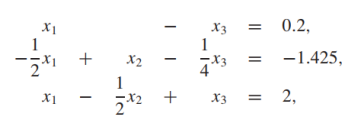  
a) ¿La matriz de coeficientes, tiene diagonal estrictamente dominante?
  
  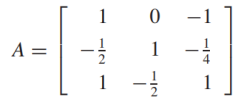


In [8]:
import numpy as np

def is_strictly_diagonally_dominant(matrix):
    """Verifica si una matriz es diagonal estrictamente dominante."""
    size = matrix.shape[0]  

    for i in range(size):
        diagonal_element = abs(matrix[i, i])
        off_diagonal_sum = sum(abs(matrix[i, j]) for j in range(size) if j != i)

        if diagonal_element <= off_diagonal_sum:
            return False  

    return True

# Definir la matriz
A_matrix = np.array([
    [1, 0, -1],
    [-1/2, 1, -1/4],
    [1, -1/2, 1]
])

# Verificar si la matriz es diagonal estrictamente dominante
if is_strictly_diagonally_dominant(A_matrix):
    print("La matriz es diagonal estrictamente dominante.")
else:
    print("La matriz NO es diagonal estrictamente dominante.")


La matriz NO es diagonal estrictamente dominante.


b) Utilice el método iterativo de Gauss-Siedel para aproximar la solución para el sistema lineal con una tolerancia de $10_{22}$ y un máximo de 300 iteraciones."

In [9]:
import numpy as np

def gauss_seidel(A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int, decimals=4) -> np.array:
    """Resuelve un sistema de ecuaciones mediante el método de Gauss-Seidel con tolerancia y máximo de iteraciones."""
    
    # Verificación de tipos y dimensiones
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser cuadrada (n x n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe tener tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe tener tamaño n."

    # Inicialización
    n = A.shape[0]
    x_current = x0.copy()

    print(f"Iteración {0}: {np.round(x_current, decimals)}")

    for iteration in range(1, max_iter + 1):
        x_next = x_current.copy()

        for i in range(n):
            sum_terms = sum(A[i, j] * x_next[j] for j in range(n) if j != i)
            x_next[i] = (b[i] - sum_terms) / A[i, i]

        x_next = np.round(x_next, decimals)
        print(f"Iteración {iteration}: {x_next}")

        # Criterio de convergencia
        if np.linalg.norm(x_next - x_current, ord=np.inf) < tol:
            print(f"Convergencia alcanzada en {iteration} iteraciones.")
            return x_next

        x_current = x_next.copy()

    print(f"No se alcanzó la convergencia en {max_iter} iteraciones.")
    return x_current

# Parámetros
tol = 1e-2
max_iter = 300

# Definir la matriz del sistema
A_matrix = np.array([
    [1, 0, -1],
    [-0.5, 1, -0.25],
    [1, -0.5, 1]
], dtype=float)

b_vector = np.array([0.2, -1.425, 2], dtype=float)
initial_guess = np.zeros(3, dtype=float)

# Resolver el sistema con Gauss-Seidel
solution = gauss_seidel(A=A_matrix, b=b_vector, x0=initial_guess, tol=tol, max_iter=max_iter)

print("\nSolución final del sistema lineal con Gauss-Seidel:")
print(solution)


Iteración 0: [0. 0. 0.]
Iteración 1: [ 0.2    -1.325   1.1375]
Iteración 2: [ 1.3375 -0.4719  0.4266]
Iteración 3: [ 0.6266 -1.005   0.8709]
Iteración 4: [ 1.0709 -0.6718  0.5932]
Iteración 5: [ 0.7932 -0.8801  0.7668]
Iteración 6: [ 0.9668 -0.7499  0.6582]
Iteración 7: [ 0.8582 -0.8314  0.7261]
Iteración 8: [ 0.9261 -0.7804  0.6837]
Iteración 9: [ 0.8837 -0.8122  0.7102]
Iteración 10: [ 0.9102 -0.7924  0.6936]
Iteración 11: [ 0.8936 -0.8048  0.704 ]
Iteración 12: [ 0.904  -0.797   0.6975]
Iteración 13: [ 0.8975 -0.8019  0.7016]
Convergencia alcanzada en 13 iteraciones.

Solución final del sistema lineal con Gauss-Seidel:
[ 0.8975 -0.8019  0.7016]


c) ¿Qué pasa en la parte b) cuando el sistema cambia por el siguiente?
  
  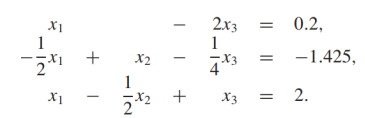

In [10]:
import numpy as np

def gauss_seidel(A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int, decimals=4) -> np.array:
    """Resuelve un sistema de ecuaciones mediante el método de Gauss-Seidel con tolerancia y máximo de iteraciones."""
    
    # Verificación de tipos y dimensiones
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser cuadrada (n x n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe tener tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe tener tamaño n."

    # Inicialización
    n = A.shape[0]
    x_current = x0.copy()

    print(f"Iteración {0}: {np.round(x_current, decimals)}")

    for iteration in range(1, max_iter + 1):
        x_next = x_current.copy()

        for i in range(n):
            sum_terms = sum(A[i, j] * x_next[j] for j in range(n) if j != i)
            x_next[i] = (b[i] - sum_terms) / A[i, i]

        x_next = np.round(x_next, decimals)
        print(f"Iteración {iteration}: {x_next}")

        # Criterio de convergencia
        if np.linalg.norm(x_next - x_current, ord=np.inf) < tol:
            print(f"Convergencia alcanzada en {iteration} iteraciones.")
            return x_next

        x_current = x_next.copy()

    print(f"No se alcanzó la convergencia en {max_iter} iteraciones.")
    return x_current

# Parámetros
tol = 1e-2
max_iter = 2

# Definir la matriz del sistema
A_matrix = np.array([
    [1, 0, -2],
    [-0.5, 1, -0.25],
    [1, -0.5, 1]
], dtype=float)

b_vector = np.array([0.2, -1.425, 2], dtype=float)
initial_guess = np.zeros(3, dtype=float)

# Resolver el sistema con Gauss-Seidel
solution = gauss_seidel(A=A_matrix, b=b_vector, x0=initial_guess, tol=tol, max_iter=max_iter)

print("\nSolución final del sistema lineal con Gauss-Seidel:")
print(solution)


Iteración 0: [0. 0. 0.]
Iteración 1: [ 0.2    -1.325   1.1375]
Iteración 2: [ 2.475   0.0969 -0.4266]
No se alcanzó la convergencia en 2 iteraciones.

Solución final del sistema lineal con Gauss-Seidel:
[ 2.475   0.0969 -0.4266]


7. Repita el ejercicio 11 usando el método de Jacobi.


In [12]:
import numpy as np

def gauss_jacobi(A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int, decimals=4) -> np.array:
    """Resuelve un sistema de ecuaciones mediante el método de Jacobi con tolerancia y máximo de iteraciones."""
    
    # --- Validación de los argumentos ---
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser cuadrada (n x n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe tener tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe tener tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x_current = x0.copy()

    print(f"Iteración {0}: {np.round(x_current, decimals)}")

    for iteration in range(1, max_iter + 1):
        x_next = np.zeros_like(x0)

        for i in range(n):
            sum_terms = sum(A[i, j] * x_current[j] for j in range(n) if j != i)
            x_next[i] = (b[i] - sum_terms) / A[i, i]

        x_next = np.round(x_next, decimals)
        print(f"Iteración {iteration}: {x_next}")

        # Criterio de convergencia
        if np.linalg.norm(x_next - x_current) < tol:
            print(f"Convergencia alcanzada en {iteration} iteraciones.")
            return x_next

        x_current = x_next.copy()

    print(f"No se alcanzó la convergencia en {max_iter} iteraciones.")
    return x_current

# Definimos la tolerancia y el número máximo de iteraciones
tol = 1e-2
max_iter = 300

# Sistema lineal del ejercicio 6 literal b
A_matrix = np.array([
    [1, 0, -1], 
    [-0.5, 1, -0.25], 
    [1, -0.5, 1]
], dtype=float)

b_vector = np.array([0.2, -1.425, 2], dtype=float)
initial_guess = np.zeros(3, dtype=float)

# Resultado
solution = gauss_jacobi(A=A_matrix, b=b_vector, x0=initial_guess, tol=tol, max_iter=max_iter)

print("\nSolución final del sistema lineal con el método de Jacobi:")
print(solution)


Iteración 0: [0. 0. 0.]
Iteración 1: [ 0.2   -1.425  2.   ]
Iteración 2: [ 2.2    -0.825   1.0875]
Iteración 3: [ 1.2875 -0.0531 -0.6125]
Iteración 4: [-0.4125 -0.9344  0.6859]
Iteración 5: [ 0.8859 -1.4598  1.9453]
Iteración 6: [ 2.1453 -0.4957  0.3842]
Iteración 7: [ 0.5842 -0.2563 -0.3932]
Iteración 8: [-0.1932 -1.2312  1.2876]
Iteración 9: [ 1.4876 -1.1997  1.5776]
Iteración 10: [ 1.7776 -0.2868 -0.0875]
Iteración 11: [ 0.1125 -0.5581  0.079 ]
Iteración 12: [ 0.279  -1.349   1.6084]
Iteración 13: [ 1.8084 -0.8834  1.0465]
Iteración 14: [ 1.2465 -0.2592 -0.2501]
Iteración 15: [-0.0501 -0.8643  0.6239]
Iteración 16: [ 0.8239 -1.2941  1.618 ]
Iteración 17: [ 1.818  -0.6086  0.529 ]
Iteración 18: [ 0.729  -0.3838 -0.1223]
Iteración 19: [ 0.0777 -1.0911  1.0791]
Iteración 20: [ 1.2791 -1.1164  1.3768]
Iteración 21: [ 1.5768 -0.4413  0.1627]
Iteración 22: [ 0.3627 -0.5959  0.2026]
Iteración 23: [ 0.4026 -1.193   1.3394]
Iteración 24: [ 1.5394 -0.8888  1.0009]
Iteración 25: [ 1.2009 -0.40

In [13]:
import numpy as np

def gauss_jacobi(*, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int) -> np.array:

    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    print(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros_like(x0)  # prealloc
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]
        print(f"i= {k} x: {x_new.T}")
        if np.linalg.norm(x_new - x) < tol:
            print(f"Convergencia alcanzada en {k} iteraciones.")
            return x_new
        x = x_new.copy()
    else:
        print(f"No se alcanzó la convergencia en {max_iter} iteraciones.")
    return x

# Definimos la tolerancia y el número máximo de iteraciones
tol = 1e-2
max_iter = 2

# Sistema lineal modificado literal c
A_mod = np.array([[1, 0, -2], [0.5, 1, -0.25], [1, -0.5, 1]], dtype=float)
b_mod = np.array([0.2, -1.425, 2], dtype=float)
x0_mod = np.zeros((3,), dtype=float)

# Resultado
solution_mod = gauss_jacobi(A=A_mod, b=b_mod, x0=x0_mod, tol=tol, max_iter=max_iter)
print("Solución del sistema lineal método de Jacobi:\n", solution_mod)

i= 0 x: [0. 0. 0.]
i= 1 x: [ 0.2   -1.425  2.   ]
i= 2 x: [ 4.2    -1.025   1.0875]
No se alcanzó la convergencia en 2 iteraciones.
Solución del sistema lineal método de Jacobi:
 [ 4.2    -1.025   1.0875]


8. Un cable coaxial está formado por un conductor interno de 0.1 pulgadas cuadradas y un conductor externo de 0.5 pulgadas cuadradas. El potencial en un punto en la sección transversal del cable se describe mediante la ecuación de Laplace. Suponga que el conductor interno se mantiene en 0 volts y el conductor externo se mantiene en 110 volts. Aproximar el potencial entre los dos conductores requiere resolver el siguiente sistema lineal.  
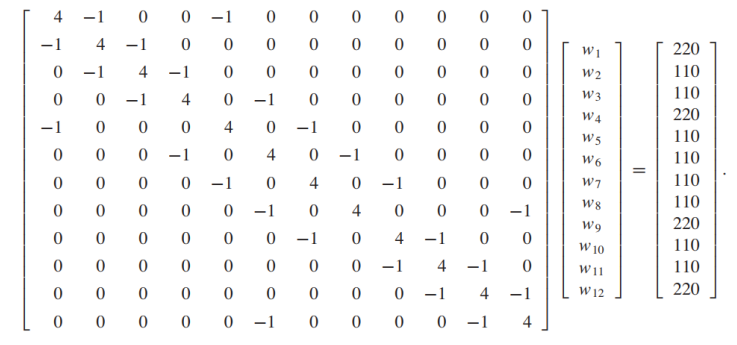  

a. ¿La matriz es estrictamente diagonalmente dominante?


In [11]:
import numpy as np

# Matriz
A = np.array([
    [4, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [-1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 4, 0, -1, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 4, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 4, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, -1, 0, 4, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, 4, 0, 0, 0, -1],
    [0, 0, 0, 0, 0, 0, -1, 0, 4, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
    [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 4]
], dtype=float)

# Verificamos si la matriz es diagonalmente dominante
def es_diagonalmente_dominante(A):
    n = A.shape[0]
    for i in range(n):
        suma = sum(abs(A[i, j]) for j in range(n) if j != i)
        if abs(A[i, i]) <= suma:
            return False
    return True

print("La matriz es diagonalmente dominante:", es_diagonalmente_dominante(A))

La matriz es diagonalmente dominante: True


b. Resuelva el sistema lineal usando el método de Jacobi con $x_{(0)} = 0$ y $TOL = 10_{-2}$."

In [15]:
import numpy as np

def gauss_seidel(*, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int) -> np.array:
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    n = A.shape[0]
    x = x0.copy()
    print(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - suma) / A[i, i]
        print(f"i= {k} x: {x.T}")
        if np.linalg.norm(x - x0) < tol:
            print(f"Convergencia alcanzada en {k} iteraciones.")
            break
        x0 = x.copy()
    else:
        print(f"No se alcanzó la convergencia en {max_iter} iteraciones.")
    return x

# Definimos la tolerancia y el número máximo de iteraciones
tol = 1e-2
max_iter = 15

# Matriz
A = np.array([
    [4, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [-1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 4, 0, -1, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 4, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 4, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, -1, 0, 4, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, 4, 0, 0, 0, -1],
    [0, 0, 0, 0, 0, 0, -1, 0, 4, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
    [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 4]
], dtype=float)

# Sistema lineal literal c
b = np.array([220, 110, 110, 220, 110, 110, 110, 110, 220, 110, 110, 220], dtype=float)
x0 = np.zeros(12, dtype=float)

# Resultado
solution = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
print("Solución del sistema lineal método de Gauss-Seidel:\n", solution)

i= 0 x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
i= 1 x: [55.         41.25       37.8125     64.453125   41.25       43.61328125
 37.8125     38.40332031 64.453125   43.61328125 38.40332031 75.50415039]
i= 2 x: [75.625      55.859375   57.578125   80.29785156 55.859375   57.17529297
 57.578125   60.66986084 80.29785156 57.17529297 60.66986084 84.46128845]
i= 3 x: [82.9296875  62.62695312 63.23120117 85.10162354 62.62695312 63.94287109
 63.23120117 64.60103989 85.10162354 63.94287109 64.60103989 87.13597775]
i= 4 x: [86.31347656 64.88616943 64.99694824 87.23495483 64.88616943 65.45899868
 64.99694824 65.64874411 87.23495483 65.45899868 65.64874411 87.7769357 ]
i= 5 x: [87.44308472 65.61000824 65.71124077 87.79255986 65.61000824 65.86032599
 65.71124077 65.90931542 87.79255986 65.86032599 65.90931542 87.94241035]
i= 6 x: [87.80500412 65.87906122 65.91790527 87.94455782 65.87906122 65.96346831
 65.91790527 65.97646967 87.94455782 65.96346831 65.97646967 87.98498449]
i= 7 x: [87.93953061 65.

c. Repita la parte b) mediante el método de Gauss-Siedel.
